## Project 3: Titanic Diaster
#### Who are the survivers? Why they survived?


### Overview
The objective of this notebook is to learn the feature engineering used by various Machine Learners. Feature engineering attempts to increase the predictive power of the learning algorithms.

This project aims predict Titanic diaster survivors and try to find the reason behind why they survived using various Machine Learning supervised algorithms.


### Domain
Any diaster, weather it could be a natural calamity, attacks, accidents, war etc, will always have victims and survivers. Every incidents will have their own investigations and analysis. Data science tools help us to bring many perspective to these analysis and understands better about the incidents. These analysis will always help us to build better world!

For detailed description of the Titanic diaster, please go through the [Kaggle competition](https://www.kaggle.com/c/titanic) description page.


## Workflow architecture







### Data preparation workflow:
Reference: [startupsci]( https://www.kaggle.com/startupsci/titanic-data-science-solutions)

After the acquisition of the raw data, data needs to be prepared and vizualised before applying any Machine Learning workflow. This is feature engineering. Following are the steps usually followed under data nnnnnnnnnn . Some of the workflow steps can be combined or skipped based on the feasability and the richness of the data.

**Correlate:** Correlation helps us to identify the contributing features on the target solution we want to predict. This is done by finding Correlation matrix and [Pearson Coefficient](http://www.maheshagodekere.com/notes/correlation).

**Classify:** Classify the features based on different criteria will be helpful to further process the classfifed/catagorised features during advanced data preparation steps.

**Completness:** Check for the completeness of the data like null values.
 
**Correctness:** Check for wrong datatypes, inaccurate values, outliners, too many zero values etc

**Convert:** Convert the datatype as per the machine learning algorithm needs.

**Create:** Features can be combined to create new features to boost prediction

**Vizualise:** Provides different perspectives on the understanding of the features.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd    #Dataframe library to manipulate data
import numpy as np   
import seaborn as sns
import re  #We'll be using regular expressions to extract the titles from people's names. Like Mr, Mrs, Count etc
from sklearn.model_selection import KFold   #for k-fold cross-validation
from sklearn import model_selection as cv      #cross-validation
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import GridSearchCV

## Reading data

Read Titanic training and test dataset into two dataframes. Training dataset comes with target values and test data without the target.

In [5]:
train_o = pd.read_csv("../data/train.csv")
test_o = pd.read_csv("../data/test.csv")
print(train_o.shape)
print(test_o.shape)


(891, 12)
(418, 11)


We need to apply all the feature engineering workflow steps on both train and test data. Combining both into a dataframe will help in achieving the same. We can split them back to training and test data before training.

In [6]:
#Mark the end of training data as we need to split them back later
marker = train_o.shape[0] 
# create a list
train_test = [train_o, test_o]
#Concat will append test data to training data with target colum as NaN
tdat = pd.concat(train_test)
# Make sure 1309 rows with 12 columns
print(tdat.shape)
tdat.head()



(1309, 12)


/Users/mahesha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## Initial peek through

Peek through the dataset to understand the superficial characterstics of the data

In [7]:
tdat.describe(include="all")


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [8]:
tdat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB



**Categorical**
Could be nominal, ordinal, ratio, or interval based.

Nominal: Embarked, Sex, Survived, PassengerId
Ordinal: Pclass

**Numerical**
Could be discrete, continuous, or timeseries based
Continious: Age, Fare
Discrete: SibSp, parch

**Mixed**
Alphanumeric: Cabin
Mixed: Ticket, Name

**Datatype**
7 features are int/fload, 5 are string obj

**Null**
Cabin and Age has NULL values and incomplete
Fare has one missing value

**distribution**
+ Most passengers (>75%) did not travel with parents (refere Parch distribution above)
+ Few passengers paid high fares
+ Nearly 30% travelled with spouse.
+ Names are unique
+ Data shows cabin values have duplicates / could be shared among passengers?
+ Ticket values have duplicate values
+ Around 64% are male and 36% are females
+ Embarked takes 3 values and S port is used by most

### Data Preparation/Feature engineering
Process column by column applying data preparation steps.

**Survived** 
is target attribute. We are going to predict this for the test dataset based on the model we create after training data learning.

**Cabin, Ticket & PassengerId**

Cabin and Ticket has too many missing/duplicates  values. Isn't very important to survial, so we drop both. 
PassenderId does not influence the survival so drop it.

In [9]:
tdat.drop(["Cabin", "Ticket","PassengerId"], axis = 1, inplace = True)

**Name** 

Though Name does not inlfuence survival, extracting the title  from name is vital and can be used as a new feature.

In [10]:
def get_title(name):
    """
    Use a regular expression to search for a title.  Titles always consist of
    capital and lowercase letters, and end with a period.
    
    Takes a name as input and returns the title string as output
    """

    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

tdat["Title"] = tdat["Name"].apply(get_title)  #We dropped "Name" earlier. So, we use original data.

#Condense the title into smaller, and more meaningful categories.
title_dict = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royal",
                        "Don":        "Royal",
                        "Sir" :       "Royal",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Countess":   "Royal",
                        "Dona":       "Royal",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royal"

                        }

def titlemap(x):
    return title_dict[x]


tdat["Title"] = tdat["Title"].apply(titlemap)

In [11]:
tdat["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [12]:
tdat["Title"].describe()

count     1309
unique       6
top         Mr
freq       757
Name: Title, dtype: object

Drop the Name as it does not influence the survival.

In [13]:
tdat = tdat.drop(['Name'], axis=1)

**Age**

As we know **Age** has missing values. There are number of ways that Age can be filled. We could apply univariate linear regression on the non null values to fill null values based on the prediction. OR we could use a simple banding. We shall use the later one.

In [14]:
def fill_ages(row):
    if not(np.isnan(row['Age'])):
        return row['Age']
    
    if row['Sex']=='female' and row['Pclass'] == 1:
        if row['Title'] == 'Miss':
            return 30
        elif row['Title'] == 'Mrs':
            return 45
        elif row['Title'] == 'Officer':
            return 49
        elif row['Title'] == 'Royalty':
            return 39

    elif row['Sex']=='female' and row['Pclass'] == 2:
        if row['Title'] == 'Miss':
            return 20
        elif row['Title'] == 'Mrs':
            return 30

    elif row['Sex']=='female' and row['Pclass'] == 3:
        if row['Title'] == 'Miss':
            return 18
        elif row['Title'] == 'Mrs':                
            return 31

    elif row['Sex']=='male' and row['Pclass'] == 1:
        if row['Title'] == 'Master':
            return 6
        elif row['Title'] == 'Mr':
            return 41.5
        elif row['Title'] == 'Officer':
            return 52
        elif row['Title'] == 'Royalty':
            return 40

    elif row['Sex']=='male' and row['Pclass'] == 2:
        if row['Title'] == 'Master':
            return 2
        elif row['Title'] == 'Mr':
            return 30
        elif row['Title'] == 'Officer':
                return 41.5

    elif row['Sex']=='male' and row['Pclass'] == 3:
        if row['Title'] == 'Master':
            return 6
        elif row['Title'] == 'Mr':
            return 26
        
tdat["Age"] = tdat.apply(fill_ages, axis = 1)


In [15]:
tdat["Age"].describe()

count    1309.000000
mean       29.278205
std        13.446690
min         0.170000
25%        21.000000
50%        26.000000
75%        36.500000
max        80.000000
Name: Age, dtype: float64

**Title**
Map the title to numerical values.

In [16]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
tdat['Title'] = tdat['Title'].map(title_mapping)
tdat['Title'] = tdat['Title'].fillna(0)


**Family**

Combing Siblings, Spouses, Parents or children onboard to a single Family variable

In [17]:
#Combing Siblings, Spouses, Parents or children onboard to a single Family variable
tdat["Family"] = tdat["Parch"] + tdat["SibSp"] + 1

**Child**
Being a child improves your chances of survival, extract the same


In [18]:
#Being a child improves your chances of survival. 
tdat["Child"] = 0
tdat.loc[tdat["Age"] <= 18, "Child"] = 1

**Alone**

Being Alone may increase survival chances. Extract the same.

In [19]:
# Extract all passengers who are alone
tdat['Alone'] = 0
tdat.loc[tdat['Family'] == 1, 'Alone'] = 1

Drop Parch and SibSp as these are part of family now

In [20]:
#Drop Parch and SibSp in favour of Alone and Child
tdat = tdat.drop(["Parch","SibSp"], axis=1)

**Sex** s non-numeric data which can't be handled by our classifier. 

In [21]:
#Sex is non-numeric data which can't be handled by our classifier. 
#set male to 0 and female to 1
tdat.loc[tdat["Sex"] == "male", "Sex"] = 0    
tdat.loc[tdat["Sex"] == "female", "Sex"] =1
tdat["Sex"] = tdat["Sex"].astype(int)

**Embarked**
Fill missing values of Embarked and convert to non-numeric

In [22]:
#Fill the missing values of Embarked
freq_port = tdat.Embarked.dropna().mode()[0]
tdat['Embarked'] = tdat['Embarked'].fillna(freq_port)

#Embarked is non-numeric data. Therefore we are going to build a couple of categorical variables to
#represent embarked

tdat["Q"] = 0
tdat.loc[tdat["Embarked"] == "Q", "Q"] = 1

tdat["S"] = 0
tdat.loc[tdat["Embarked"] == "S", "S"] = 1

tdat["C"] = 0
tdat.loc[tdat["Embarked"] == "Q", "C"] = 1

#Drop Parch and SibSp in favour of Alone and Child
tdat = tdat.drop(["Embarked"], axis=1)


**Fare**
Fill ony missing value and band the fare values

In [23]:
#Senisble imputation of missing Fare values
median_fare = tdat.loc[(tdat["Pclass"] == 3) & (tdat["S"] == 1) & (tdat["Age"] >= 55)].dropna()["Fare"].median()
tdat["Fare"] = tdat["Fare"].fillna(median_fare)

#Band the Fare values
tdat.loc[ tdat['Fare'] <= 7.91, 'Fare'] = 0
tdat.loc[(tdat['Fare'] > 7.91) & (tdat['Fare'] <= 14.454), 'Fare'] = 1
tdat.loc[(tdat['Fare'] > 14.454) & (tdat['Fare'] <= 31), 'Fare']   = 2
tdat.loc[ tdat['Fare'] > 31, 'Fare'] = 3
tdat['Fare'] = tdat['Fare'].astype(int)

Check for Nulls in any column

In [24]:
tdat.isnull().any()

Age         False
Fare        False
Pclass      False
Sex         False
Survived     True
Title       False
Family      False
Child       False
Alone       False
Q           False
S           False
C           False
dtype: bool

Break the combined data set into test and train data

In [25]:
predictors = ["Age","Fare", "Pclass", "Sex", "Family", "Title", "Child","Alone", "Q","S","C"]
#Break the combined data set into test and train data
target = tdat["Survived"].iloc[:marker]
train = tdat[predictors][:marker]
test = tdat[predictors][marker:]


Check the Train data

In [26]:
train.head()

,Age,Fare,Pclass,Sex,Family,Title,Child,Alone,Q,S,C
0,22.0,0,3,0,2,1.0,0,0,0,1,0
1,38.0,3,1,1,2,3.0,0,0,0,0,0
2,26.0,1,3,1,1,2.0,0,1,0,1,0
3,35.0,3,1,1,2,3.0,0,0,0,1,0
4,35.0,1,3,0,1,1.0,0,1,0,1,0


### Visulaization

**Correlation coefficient**

The correlation coefficient to examine the strength and direction of the linear relationship between two continuous variables.

Three variables with greatest correlation to survival are age, gender, and passenger class. Since fare and passenger class correlate so highly, we should only consider one in our analysis for the sake of simplicity. We also see that overall age is not as important as being under the age of 16 as we further dive into the exploration.

The variables of particular interest to our analysis are Age, Gender, and Passenger Class.

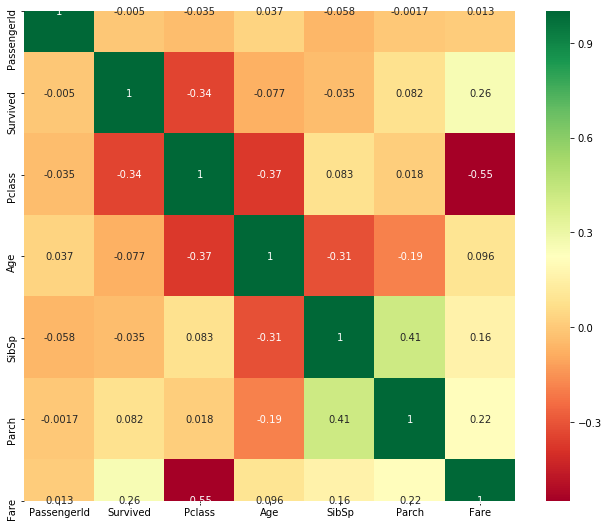

In [27]:
f, ax = plt.subplots(figsize=(11, 9))
correlation = train_o.corr()
sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn",ax=ax)
plt.show()

**Survival based on Age & Sex**

Majority of the passengers are below 40 years and almost 300 of them are between 20 and 30

In [28]:
survived = train_o.loc[train_o['Survived'] == 0, ['Age']].dropna()
not_survived = train_o.loc[train_o['Survived'] == 1, ['Age']].dropna()
survived_male = train_o.loc[ (train_o['Survived'] == 1) & (train_o['Sex'] == 'male'), ['Age']].dropna()
not_survived_male = train_o.loc[(train_o['Survived'] == 0) & (train_o['Sex'] == 'male'), ['Age']].dropna()
survived_female = train_o.loc[(train_o['Survived'] == 1) & (train_o['Sex'] == 'female'), ['Age']].dropna()
not_survived_female = train_o.loc[(train_o['Survived'] == 0) & (train_o['Sex'] == 'female'), ['Age']].dropna()


survived_children = train_o.loc[(train_o['Survived'] == 1) & (train_o['Age'] <=18), ['Age']].dropna()
not_survived_children = train_o.loc[(train_o['Survived'] == 0) & (train_o['Age'] <= 18), ['Age']].dropna()


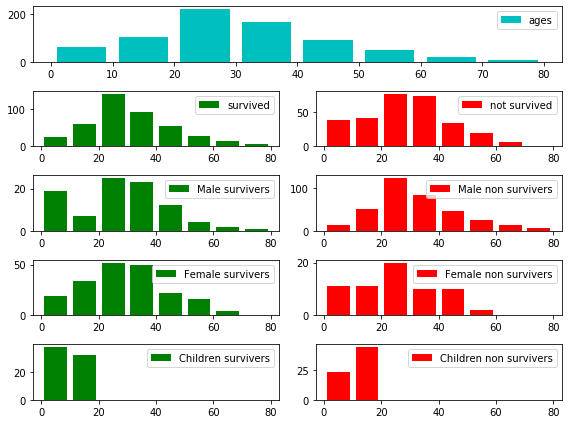

In [29]:
# fig = plt.figure(figsize=(8,6))
# ax1 = plt.subplot2grid((3,8), (0,0), colspan=8)
# ax2 = plt.subplot2grid((3,8), (1,0), colspan=6)
# ax3 = plt.subplot2grid((3,8), (1,6), colspan=2,rowspan=2)
# ax4 = plt.subplot2grid((3,8), (2,0), colspan=6)
# fig.tight_layout()
# plt.show()

bins = [0,10,20,30,40,50,60,70,80]

fig = plt.figure(figsize=(8,6))
ax = plt.subplot2grid((5,8), (0,0), colspan=8)
ax.hist(train_o["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='c',label='ages')
plt.legend()

ax = plt.subplot2grid((5,8), (1,0), colspan=4)
ax.hist(survived["Age"], bins, histtype='bar', rwidth = 0.8,color='g',label='survived')
plt.legend()
ax = plt.subplot2grid((5,8), (1,4), colspan=4)
ax.hist(not_survived["Age"], bins, histtype='bar', rwidth = 0.8,color='r',label='not survived')
plt.legend()


ax = plt.subplot2grid((5,8), (2,0), colspan=4)
ax.hist(survived_male["Age"], bins, histtype='bar', rwidth = 0.8,color='g',label='Male survivers')
plt.legend()
ax = plt.subplot2grid((5,8), (2,4), colspan=4)
ax.hist(not_survived_male["Age"], bins, histtype='bar', rwidth = 0.8,color='r',label='Male non survivers')
plt.legend()

ax = plt.subplot2grid((5,8), (3,0), colspan=4)
ax.hist(survived_female["Age"], bins, histtype='bar', rwidth = 0.8,color='g',label='Female survivers')
plt.legend()
ax = plt.subplot2grid((5,8), (3,4), colspan=4)
ax.hist(not_survived_female["Age"], bins, histtype='bar', rwidth = 0.8,color='r',label='Female non survivers')
plt.legend()

ax = plt.subplot2grid((5,8), (4,0), colspan=4)
ax.hist(survived_children["Age"], bins, histtype='bar', rwidth = 0.8,color='g',label='Children survivers')
plt.legend()
ax = plt.subplot2grid((5,8), (4,4), colspan=4)
ax.hist(not_survived_children["Age"], bins, histtype='bar', rwidth = 0.8,color='r',label='Children non survivers')
plt.legend()
# ax3 = plt.subplot2grid((3,8), (1,4), colspan=4)
# ax3.hist(train_o.loc[train_o["Survived"] == 0,'Age'], bins, histtype='bar', rwidth = 0.8,color='r',label='ages')

plt.legend()
plt.tight_layout()
plt.show()

**Survival based on Age & Class**

In [30]:
c1_s = train_o.loc[(train_o['Survived'] == 1) & (train_o['Pclass'] == 1), ['Age']].dropna()
c1_d = train_o.loc[(train_o['Survived'] == 0) & (train_o['Pclass'] == 1), ['Age']].dropna()

c2_s = train_o.loc[(train_o['Survived'] == 1) & (train_o['Pclass'] == 2), ['Age']].dropna()
c2_d = train_o.loc[(train_o['Survived'] == 0) & (train_o['Pclass'] == 2), ['Age']].dropna()

c3_s = train_o.loc[(train_o['Survived'] == 1) & (train_o['Pclass'] == 3), ['Age']].dropna()
c3_d = train_o.loc[(train_o['Survived'] == 0) & (train_o['Pclass'] == 3), ['Age']].dropna()


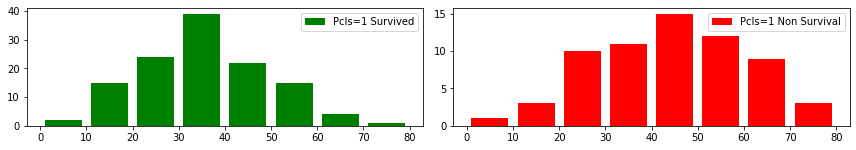

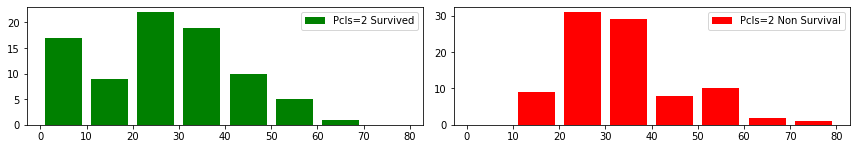

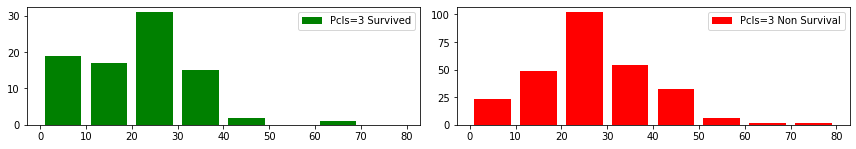

In [31]:

bins = [0,10,20,30,40,50,60,70,80]

fig = plt.figure(figsize=(12,6))
ax = plt.subplot2grid((3,8), (0,0), colspan=4)
ax.hist(c1_s["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='g',label='Pcls=1 Survived')
plt.legend()

ax = plt.subplot2grid((3,8), (0,4), colspan=4)
ax.hist(c1_d["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='r',label='Pcls=1 Non Survival')
plt.legend()

plt.tight_layout()

fig = plt.figure(figsize=(12,6))
ax = plt.subplot2grid((3,8), (1,0), colspan=4)
ax.hist(c2_s["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='g',label='Pcls=2 Survived')
plt.legend()

ax = plt.subplot2grid((3,8), (1,4), colspan=4)
ax.hist(c2_d["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='r',label='Pcls=2 Non Survival')
plt.legend()
plt.tight_layout()

fig = plt.figure(figsize=(12,6))
ax = plt.subplot2grid((3,8), (1,0), colspan=4)
ax.hist(c3_s["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='g',label='Pcls=3 Survived')
plt.legend()

ax = plt.subplot2grid((3,8), (1,4), colspan=4)
ax.hist(c3_d["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='r',label='Pcls=3 Non Survival')
plt.legend()


plt.tight_layout()
plt.show()

**Survival based on Age & Embarked**

In [32]:
c1_s = train_o.loc[(train_o['Survived'] == 1) & (train_o['Embarked'] == 'S'), ['Age']].dropna()
c1_d = train_o.loc[(train_o['Survived'] == 0) & (train_o['Embarked'] == 'S'), ['Age']].dropna()

c2_s = train_o.loc[(train_o['Survived'] == 1) & (train_o['Embarked'] == 'C'), ['Age']].dropna()
c2_d = train_o.loc[(train_o['Survived'] == 0) & (train_o['Embarked'] == 'C'), ['Age']].dropna()

c3_s = train_o.loc[(train_o['Survived'] == 1) & (train_o['Embarked'] == 'Q'), ['Age']].dropna()
c3_d = train_o.loc[(train_o['Survived'] == 0) & (train_o['Embarked'] == 'Q'), ['Age']].dropna()


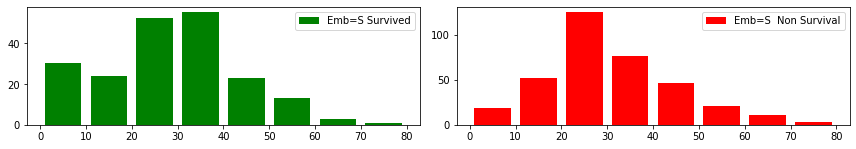

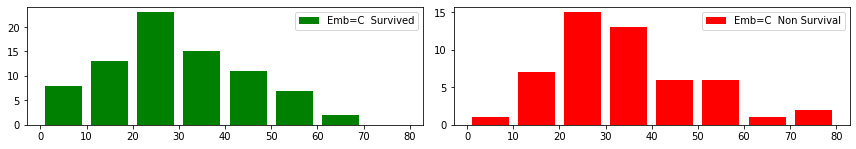

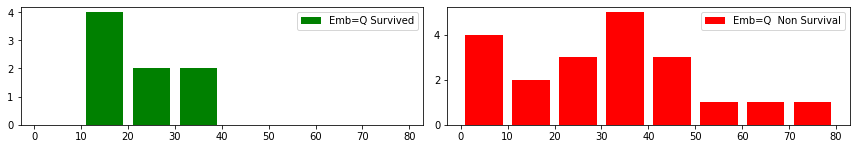

In [33]:
bins = [0,10,20,30,40,50,60,70,80]

fig = plt.figure(figsize=(12,6))
ax = plt.subplot2grid((3,8), (0,0), colspan=4)
ax.hist(c1_s["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='g',label='Emb=S Survived')
plt.legend()

ax = plt.subplot2grid((3,8), (0,4), colspan=4)
ax.hist(c1_d["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='r',label='Emb=S  Non Survival')
plt.legend()

plt.tight_layout()

fig = plt.figure(figsize=(12,6))
ax = plt.subplot2grid((3,8), (1,0), colspan=4)
ax.hist(c2_s["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='g',label='Emb=C  Survived')
plt.legend()

ax = plt.subplot2grid((3,8), (1,4), colspan=4)
ax.hist(c2_d["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='r',label='Emb=C  Non Survival')
plt.legend()
plt.tight_layout()

fig = plt.figure(figsize=(12,6))
ax = plt.subplot2grid((3,8), (1,0), colspan=4)
ax.hist(c3_s["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='g',label='Emb=Q Survived')
plt.legend()

ax = plt.subplot2grid((3,8), (1,4), colspan=4)
ax.hist(c3_d["Age"].dropna(), bins, histtype='bar', rwidth = 0.8,color='r',label='Emb=Q  Non Survival')
plt.legend()


plt.tight_layout()
plt.show()

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")


In [35]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)


In [36]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

In [37]:
X = train.values
y = target.values
log.drop(log.index, inplace=True)


In [38]:
acc_dict = {}

In [39]:
for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

In [40]:
for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)
    
    

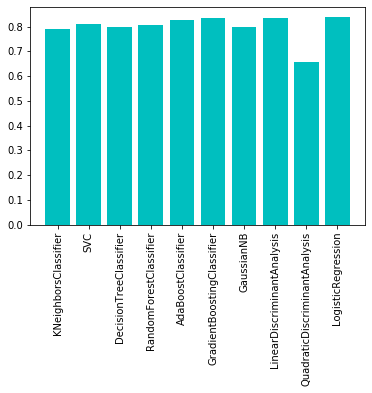

,Classifier,Accuracy
0,KNeighborsClassifier,0.791111
0,SVC,0.811111
0,DecisionTreeClassifier,0.797778
0,RandomForestClassifier,0.806667
0,AdaBoostClassifier,0.824444
0,GradientBoostingClassifier,0.835556
0,GaussianNB,0.797778
0,LinearDiscriminantAnalysis,0.834444
0,QuadraticDiscriminantAnalysis,0.655556
0,LogisticRegression,0.836667


In [41]:
log
x=[1,2,3,4,5,6,7,8,9,10]
# plt.xlabel('Accuracy')
# plt.title('Classifier Accuracy')
# #sns.set_color_codes("muted")
# type(log['Accuracy'])

# #plt.bar(y, x, label='Acuracy', color="b")
# #x


# x=[1,2,3,4]
# labels=['jan','feb','mar','apr']
# y=[40,70,30,54]
plt.bar(x,log['Accuracy'], align='center', color='c')
plt.xticks(x, log['Classifier'], rotation=90)
plt.show()
log



Let us take the Logistic regression classifier which has the pretty good accuracy around 83.6%

In [42]:
# Logistic Regression : 
logi_reg = LogisticRegression()
# Fit the regressor to the training data
logi_reg.fit(train, target)
# Predict on the test data: y_pred
y_pred = logi_reg.predict(X_test)

print(X_test.shape)
print(y_pred.size)


(90, 11)
90


## Model Evaluation

### Confusion Matrix
Comparing the true survival outcomes against the model predicted ones. Confusion Matrix provides thye following:

1. **Correct classification:** In this case the model correct predicted values, whether the passengers survuved or not survived.
2. **False positive:** Model predicted as survived but passenger actually died.
3. **False negative:** Model predicted as not survived but passenger actually survived.


In [43]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])

Predicted,0.0,1.0
True,,
0.0,49,6
1.0,6,29


### ROC Plot
The Receiver Operator Characteristic (ROC) plot is a popular method of presenting the performance of a classifier. For this to work your predictions need to be on a scale of 0 to 1, and not just 0’s or 1’s. The plot shows the trade-off between sensitivity and specificity of the model as the threshold changes. These are also refered to as the ‘false positive rate’ (FPR) and the ‘true positive rate’ (TPR).

To produce this we need to calculate the TPR and FPR at different thresholds, SciKit Learn does this for us…

In [44]:
fpr, tpr, thresholds = roc_curve( y_test,y_pred)
plt.plot(fpr, tpr)
 
# Add the labels
plt.ylabel("Sensitivity")
plt.xlabel("1 - Specificity")

NameError: name 'roc_curve' is not defined

It shows that we can adjust the threshold to increase sensitivity and the cost of specificity, and visa versa. An example can be seen…

If we have a sensitivity of 0.8 we have a specificity of about 0.78 (1 – 0.22)
If we change the threshold to increase sensitivity to 0.9 we have a specificity of around 0.4 (1 – 0.6).
From this we also can also calculate the Area Under the Curve (AUC). This is a good measure of performance. An AUC of 0.5 means the model is not very good, it is no better than a 50/50 guess. If we have an AUC of less than 0.5 then something went wrong. When you read clinical papers looking at predicting life/death or illness/no-illness then an AUC greater than 0.7 is good and an AUC greater than 0.859 is very good.

In [45]:
auc(fpr, tpr)

NameError: name 'auc' is not defined

**This concludes the Titanic Diaster project**